2 3


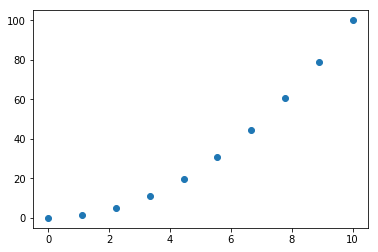

In [2]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]])
l1, l2 = a.shape #unpacking a tuple
print(l1, l2)
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 10)
y = x**2
plt.plot(x, y, 'o')


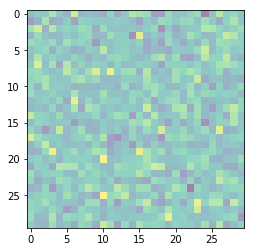

In [3]:
image = np.random.randn(30, 30)
plt.imshow(image, alpha=0.5)

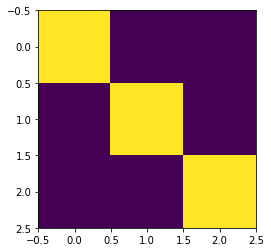

In [4]:
plt.imshow(np.eye(3))

In [5]:
a = [1, 2, 3]
print(a, a[::-1], a)

[1, 2, 3] [3, 2, 1] [1, 2, 3]


In [6]:
x = np.arange(0, 6)
y = np.arange(0, 60, 10)
ida = x + y[:, np.newaxis]
ida[:, 2] #red
ida[0, 3:5] #orange
ida[2::2, 0::2] #green
ida[4:, 4:]
print(ida)
b = np.arange(10)
ida[5, 4:] = b[1:3]
print(ida)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53  1  2]]


In [7]:
t = np.array([[4, 3], [2, 1]])
np.tile(t, (2, 3))

array([[4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1],
       [4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1]])

In [8]:
#eratostenes seive
store = np.ones(100, dtype=np.bool)
store.reshape(10, 10)
store[0:2] = False

for i in range(2, 100):
    store[2*i::i] = False
    
primes = np.nonzero(store)
print(primes)
len(primes[0])

correct_ans = [ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
print(type(primes), type(primes[0]))
np.array_equal(primes[0], np.array(correct_ans))


(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97]),)
<class 'tuple'> <class 'numpy.ndarray'>


True

In [9]:
#fancy indexing
b = ida.reshape(1, 36)
print(b % 5 == 0)
b[b % 5 == 0]

[[ True False False False False  True  True False False False False  True
   True False False False False  True  True False False False False  True
   True False False False False  True  True False False False False False]]


array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

Indexing can be combined with assignment in numpy

In [10]:
#exercise r, b, g
ida[5, 4] = 54
ida[5, 5] = 55
print(ida)
ida[[0, 2, 5], 2], ida[3:, [0, 2, 5]], ida[np.arange(0, 5), np.arange(1, 6)]

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


(array([ 2, 22, 52]), array([[30, 32, 35],
        [40, 42, 45],
        [50, 52, 55]]), array([ 1, 12, 23, 34, 45]))

Section 1.3.2, numerical operations on numpy arrays

In [11]:
#its fast
n = 1000
a = np.arange(n)
%timeit a + 1
%timeit [i + 1 for i in range(1000)]
print("hi")

1.22 µs ± 19.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


55.2 µs ± 190 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
hi


In [12]:
a = np.ones((2, 2))
print(a * a)
print(a.dot(a))

b = np.arange(1, 4)
print(b)

c = np.triu(np.ones(3), 1)
print(c)
d = c.T.copy()
print("-------\n", c, "\n\n", d)

[[1. 1.]
 [1. 1.]]
[[2. 2.]
 [2. 2.]]
[1 2 3]
[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]]
-------
 [[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]] 

 [[0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 0.]]


In [13]:
#reductions
#sum
x = np.array([[1, 1], [2, 2]])
x.sum()
print(x.sum(axis = 0))
print(x.sum(axis = 1))

np.random.rand(3, 3, 3)
a = np.arange(3*3*3).reshape(3, 3, 3)
print(a)
a.sum(axis=0), a.sum(axis=1), a.sum(axis=2)

[3 3]
[2 4]
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


(array([[27, 30, 33],
        [36, 39, 42],
        [45, 48, 51]]), array([[ 9, 12, 15],
        [36, 39, 42],
        [63, 66, 69]]), array([[ 3, 12, 21],
        [30, 39, 48],
        [57, 66, 75]]))

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #the options for that are 'all', 'none', 'last' and 'last_expr'(the default is last_expr)

In [15]:
# now we have enhanced interactivity, no need to print each line
a = 3
a
a+1

3

4

In [16]:
x = np.array([1, 1, 2, 3], dtype=int)
np.median(x)
np.mean(x)

1.5

1.75

#commented lines are not loaded
# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


array([[ 1900.,  1901.,  1902.,  1903.,  1904.,  1905.,  1906.,  1907.,
         1908.,  1909.,  1910.,  1911.,  1912.,  1913.,  1914.,  1915.,
         1916.,  1917.,  1918.,  1919.,  1920.],
       [30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
        22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
        11200.,  7600., 14600., 16200., 24700.],
       [ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
         8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
        29700., 15800.,  9700., 10100.,  8600.],
       [48300., 48200., 41500., 38200., 40600., 39800., 38600., 42300.,
        44500., 42100., 46000., 46800., 43800., 40900., 39400., 39000.,
        36700., 41800., 43300., 41300., 47300.]])

(21, 3)

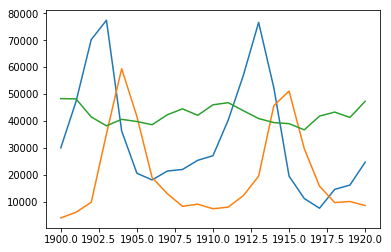

In [17]:
!cat populations.txt
data = np.loadtxt("populations.txt")
data.T
year, hare, lynx, carrot = data.T
plt.plot(year, hare, year, lynx, year, carrot)

populations = data[:, 1:]
populations.shape

(1000, 200)

(200,)

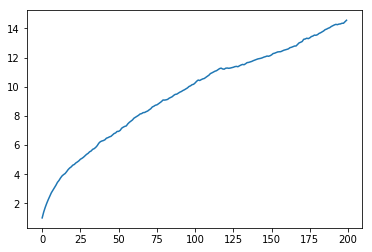

In [18]:
#diffusion
n_stories = 1000
t_max = 200
ran = np.random.choice([-1, 1], size=n_stories * t_max)
jumps = ran.reshape(n_stories, t_max)
pos = jumps.cumsum(axis=1)
pos.shape

#need to plot d(t) where t is num of jumps 
#and d is the rms of dist_from_origin at 't'
d_t = np.mean(pos ** 2, axis=0) ** 0.5
d_t.shape
plt.plot(np.arange(0, t_max), d_t)

In [ ]:
a = np.ones(4, dtype=int)
a
a.reshape(2, -1) # -1 means auto infer

array([1, 1, 1, 1])

array([[1, 1],
       [1, 1]])

In [63]:
#stopped at broadcasting
a = np.arange(1, 4)
a
a.shape
a.ndim
a[np.newaxis, :].shape
a[:, np.newaxis].shape

array([1, 2, 3])

(3,)

1

(1, 3)

(3, 1)

In [65]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
mileposts.shape
b = mileposts[:, np.newaxis] #(10, ) to (10, 1)
mileposts - b

(10,)

array([[    0,   198,   303,   736,   871,  1175,  1475,  1544,  1913,
         2448],
       [ -198,     0,   105,   538,   673,   977,  1277,  1346,  1715,
         2250],
       [ -303,  -105,     0,   433,   568,   872,  1172,  1241,  1610,
         2145],
       [ -736,  -538,  -433,     0,   135,   439,   739,   808,  1177,
         1712],
       [ -871,  -673,  -568,  -135,     0,   304,   604,   673,  1042,
         1577],
       [-1175,  -977,  -872,  -439,  -304,     0,   300,   369,   738,
         1273],
       [-1475, -1277, -1172,  -739,  -604,  -300,     0,    69,   438,
          973],
       [-1544, -1346, -1241,  -808,  -673,  -369,   -69,     0,   369,
          904],
       [-1913, -1715, -1610, -1177, -1042,  -738,  -438,  -369,     0,
          535],
       [-2448, -2250, -2145, -1712, -1577, -1273,  -973,  -904,  -535,
            0]])

In [57]:
#broadcasting generalised rules even applicable to higher dimensions
B = np.ones((4, 6))
B
print("\n\n")
C = B[:, np.newaxis,:]
C
C.shape
#np.array_equal(B, B2)
A = np.ones((3,4,5,6))

D = A + C 
D.shape

#C will be broadcast notice?
#from docs
#It starts with the trailing dimensions, and works its way forward

#RULE: 
#1. Either Trailing dimensions should match 
#2. Or one of the trailing dimensions should be 1
#Read https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html

E = A + C[np.newaxis, :, :, :] 
np.array_equal(D, E)

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

array([[[1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.]]])

(4, 1, 6)

(3, 4, 5, 6)

True

In [83]:
A = np.arange(3, 10)
A.base is None
B = A[0:4]
B.base is A #alternative to np.may_share_memory(..
np.may_share_memory(A, B)

C = A
np.may_share_memory(C, A)

rbg = np.ones((2, 3))
rbg
rbg_check_if_copy = rbg[[0], :]
rbg_check_if_copy
np.may_share_memory(rbg, rbg_check_if_copy) #fancy indexing always creates view? so what indexing is classified as fancy indexing
# refer http://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/

# TAKEAAWAY: THE TAKEAWAY IS THAT WHENEVER YOU WANT TO EDIT A COPY OF
# THE DATA BUT NOT THE ORIGINAL, USE NP.COPY(). OR FANCY INDEXING LIKE
# Z[[0],:] IF YOU TRUST YOURSELF TO REMEMBER WHAT THAT IS

# from coookbook:
# The rule of thumb here can be: in the context of lvalue indexing
# (i.e. the indices are placed in the left hand side value of an
# assignment), no view or copy of the array is created (because there
# is no need to).

True

True

True

True

array([[1., 1., 1.],
       [1., 1., 1.]])

array([[1., 1., 1.]])

False

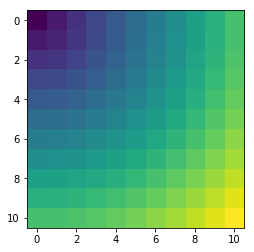

In [92]:
#dist from origin of pooints in 10x10 grid
x = np.arange(0, 11)
y = x[:, np.newaxis]
r = np.sqrt(x ** 2 + y ** 2)
plt.imshow(r)

In [96]:
#transpose in higher dimensions, shape reverses
o = np.ones((2, 3, 4, 5)) #visualize intuition? 2,3 grid of (4,5) size matrices, @blog?? like a fractal explore it? reddit?
o
o.T.shape #shape just gets reversed

[[[[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]]]


(5, 4, 3, 2)

# doubt on numpy.transpose¶ method vs function calling,  a function can also be a method intuition
some useful functions, np.argmin, np.argmax, np.argsort

section 1.3.2 ends here

# Section 1.3.3 starts = this section just quick read

In [156]:
max = 2**64 - 1
max
m2 = max + max # How does python make sure that int64 doesnt overflow, see next cell
m2
bin(max)
bin(m2)


test = np.ones(1, dtype=np.int64)
test.shape
print(type(test))
test = np.ones((1,1), dtype=np.int64)
test.shape
test.dtype
9999

test[0,0] = np.iinfo(np.int64).max #althoug rhs is python unoveflowable int, assignment to numpy doesnt change lhs' type
#test[0,0] is still numpy.int64
test
test.dtype

#test[0, 0] = np.iinfo(np.int64).max + 1
#test #overflow, atleast its not silent overflow
#test.dtype

test + 1 #SILENT OVERFLOW!!

#np.mean auto use float64 on int64 overflow, np.sum does NOT

18446744073709551615

36893488147419103230

'0b1111111111111111111111111111111111111111111111111111111111111111'

'0b11111111111111111111111111111111111111111111111111111111111111110'

(1,)

<class 'numpy.ndarray'>


(1, 1)

dtype('int64')

9999

array([[9223372036854775807]])

dtype('int64')

array([[-9223372036854775808]])

overflow:
Can integers overflow in python?

Short answers:

No if the operations are done in pure python, because python integers have arbitrary precision
Yes        if the operations are done in the pydata stack (numpy/pandas), because they use C-style fixed-precision integers

source: https://mortada.net/can-integer-operations-overflow-in-python.html

numpy Structured data types, 
anoop: maybe use them to enforce a pseudo type system?
1.3.3.2 skip for now
1.3.3.3 masked array for missing data, skip for now

## SEction 1.3.4 :-

poly1d([ 3,  2, -1])

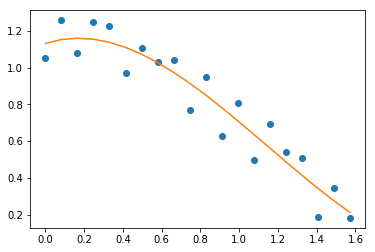

In [182]:
#Polynomials
p = np.poly1d([3, 2, -1]) #3 x ** 2 + 2 * x - 1, imp: should specify array as the coeff c, dont miss the square braces
p

x = np.linspace(0, np.pi / 2, 20)
y = np.cos(x) + 0.3 * np.random.rand(20)

plt.plot(x, y, 'o')

coeff = np.polyfit(x, y, 3)
p = np.poly1d(coeff)
plt.plot(x, p(x))

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

(548, 848, 4)

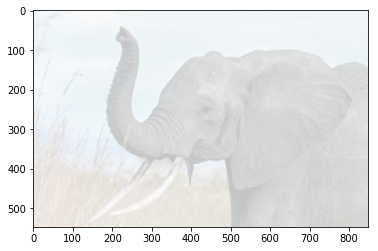

In [203]:
#loading files
data = np.loadtxt("populations.txt")
data
#get rid of first 5 row and last column exercise
b = data[5:, :]
np.savetxt("pop2.txt", b)

#images
#Screenshot 2019-02-07 at 5.09.16 PM.png
img = plt.imread('elephant.png')
img.shape
#plt.imshow(img)

img[:, :, [3]] = 0.25, RGB alpha
plt.imshow(img)

In [214]:
#Section 1.3.5 exercises
#q1
a = np.arange(1, 16).reshape(3, -1).T
a[[1, 3]]

array([[ 2,  7, 12],
       [ 4,  9, 14]])

In [227]:
#q2
a = np.arange(25).reshape(5, 5)
a
b = np.array([1, 5, 10, 15, 20])
a.shape, b.shape
c = b[:, np.newaxis]
c.shape
c
a / c

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

((5, 5), (5,))

(5, 1)

array([[ 1],
       [ 5],
       [10],
       [15],
       [20]])

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.2       , 1.4       , 1.6       , 1.8       ],
       [1.        , 1.1       , 1.2       , 1.3       , 1.4       ],
       [1.        , 1.06666667, 1.13333333, 1.2       , 1.26666667],
       [1.        , 1.05      , 1.1       , 1.15      , 1.2       ]])

In [260]:
#q3
np.random.seed(6)
a = np.random.randn(10, 3)
a
a - 0.5
dists = np.absolute(a - 0.5)
dists
dists.argsort(axis=1)
argcols = dists.argsort(axis=1)[:, 0]
a[np.arange(10), argcols]

array([[-0.31178367,  0.72900392,  0.21782079],
       [-0.8990918 , -2.48678065,  0.91325152],
       [ 1.12706373, -1.51409323,  1.63929108],
       [-0.4298936 ,  2.63128056,  0.60182225],
       [-0.33588161,  1.23773784,  0.11112817],
       [ 0.12915125,  0.07612761, -0.15512816],
       [ 0.63422534,  0.810655  ,  0.35480861],
       [ 1.81259031, -1.3564758 , -0.46363197],
       [ 0.82465384, -1.17643148,  1.56448966],
       [ 0.71270509, -0.1810066 ,  0.53419953]])

array([[-0.81178367,  0.22900392, -0.28217921],
       [-1.3990918 , -2.98678065,  0.41325152],
       [ 0.62706373, -2.01409323,  1.13929108],
       [-0.9298936 ,  2.13128056,  0.10182225],
       [-0.83588161,  0.73773784, -0.38887183],
       [-0.37084875, -0.42387239, -0.65512816],
       [ 0.13422534,  0.310655  , -0.14519139],
       [ 1.31259031, -1.8564758 , -0.96363197],
       [ 0.32465384, -1.67643148,  1.06448966],
       [ 0.21270509, -0.6810066 ,  0.03419953]])

array([[0.81178367, 0.22900392, 0.28217921],
       [1.3990918 , 2.98678065, 0.41325152],
       [0.62706373, 2.01409323, 1.13929108],
       [0.9298936 , 2.13128056, 0.10182225],
       [0.83588161, 0.73773784, 0.38887183],
       [0.37084875, 0.42387239, 0.65512816],
       [0.13422534, 0.310655  , 0.14519139],
       [1.31259031, 1.8564758 , 0.96363197],
       [0.32465384, 1.67643148, 1.06448966],
       [0.21270509, 0.6810066 , 0.03419953]])

array([[1, 2, 0],
       [2, 0, 1],
       [0, 2, 1],
       [2, 0, 1],
       [2, 1, 0],
       [0, 1, 2],
       [0, 2, 1],
       [2, 0, 1],
       [0, 2, 1],
       [2, 0, 1]])

array([ 0.72900392,  0.91325152,  1.12706373,  0.60182225,  0.11112817,
        0.12915125,  0.63422534, -0.46363197,  0.82465384,  0.53419953])

(668, 924, 3)

numpy.ndarray

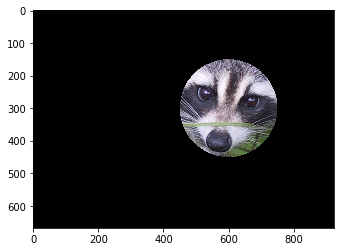

In [306]:
from scipy import misc
face = misc.face()
#plt.imshow(face)
f = face[50:-50, 50:-50]
plt.imshow(f)

#my own mask
#(300, 600) at nose
f.shape
type(f)
mx, my, waste = f.shape
#numpy.ogrid(0:mx, 0:my)
x, y = np.ogrid[0:mx, 0:my] #https://stackoverflow.com/questions/16755482/why-does-numpy-r-use-brackets-instead-of-parentheses
mask = (x - 300) ** 2 + (y - 600) ** 2 > 150 ** 2
f2 = f.copy()
f2[mask] = 0
plt.imshow(f2)



If you find yourself doing things like this regularly it may be worth investigating the object-oriented interface to matplotlib. In your case:

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
y = np.exp(x)
fig1, ax1 = plt.subplots()
ax1.plot(x, y)
ax1.set_title("Axis 1 title")
ax1.set_xlabel("X-label for axis 1")

z = np.sin(x)
fig2, (ax2, ax3) = plt.subplots(nrows=2, ncols=1) # two axes on figure
ax2.plot(x, z)
ax3.plot(x, -z)

w = np.cos(x)
ax1.plot(x, w) # can continue plotting on the first axis

It is a little more verbose but it's much clearer and easier to keep track of, especially with several figures each with multiple subplots.


array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

(34080.95238095238, 20166.666666666668, 42400.0)

(20897.906458089667, 16254.591536908763, 3322.5062255844787)

array([1903., 1904., 1900.])

array(['Carot', 'Carot', 'Hare', 'Hare', 'Lynx', 'Lynx', 'Carot', 'Carot',
       'Carot', 'Carot', 'Carot', 'Carot', 'Hare', 'Hare', 'Hare', 'Lynx',
       'Carot', 'Carot', 'Carot', 'Carot', 'Carot'], dtype='<U5')

array([1902., 1903., 1904., 1912., 1913., 1914., 1915.])

(2, 3)

(2, 3)

array([[17,  0, 16],
       [16,  1,  3]])

array([[17, 16],
       [ 0,  1],
       [16,  3]])

array([[1917., 1916.],
       [1900., 1901.],
       [1916., 1903.]])

array([ 17200.,  20100.,  15100., -16950., -28400.,  -9100.,    400.,
         1950.,   2000.,   2550.,   7450.,  14950.,  18150.,  -2350.,
       -28550., -20550.,  -5950.,   1700.,   4300.,   5050.,   8500.])

array([[1.        , 0.07189206],
       [0.07189206, 1.        ]])

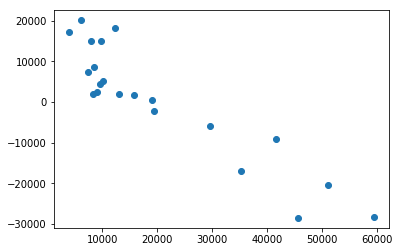

In [374]:
data
y, h, l, c = data.T
plt.clf()
plt.plot(y, h, y, l, y, c)
plt.legend(("1hare", "2lynx", "3carrto"))
h.mean(), l.mean(), c.mean()
h.std(), l.std(), c.std()

argmaxes = np.argmax(data, axis = 0)[1:]
y[argmaxes]

#3
pops = data[:, 1:]
argmaxes = np.argmax(pops, axis = 1)
species = np.array(['Hare', 'Lynx', 'Carot'])
species[argmaxes]
#4
mask = np.any(pops > 50000, axis = 1)
y[mask]
#5
args = np.argsort(pops, axis = 0)[:2, :]
args
args.T
y[args.T]

#6
dh = np.gradient(h)
dh
np.corrcoef(l, h)
plt.clf()
plt.plot(l, dh, 'o')

Skipped after integral approximations question